#### Step 0: Generate dummy data

In [14]:
"""
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
"""

'\nimport pandas as pd\nimport numpy as np\nimport random\nfrom datetime import datetime, timedelta\n'

In [7]:
# Set random seed for reproducibility
random.seed(42)

In [8]:
# Generate dates for 3 years (36 months) starting from January 2020
"""
start_date = datetime(2020, 1, 1)
end_date = start_date + timedelta(days=365*3)
dates = pd.date_range(start=start_date, end=end_date, freq='MS')
"""

In [9]:
# Generate dummy data for sales
"""
sales_data = pd.DataFrame({
    'Date': dates,
    'Customer_ID': [random.randint(1, 100) for _ in range(len(dates))],
    'Product_ID': [random.choice(['A', 'B', 'C']) for _ in range(len(dates))],
    'Product_Category': [random.choice(['Electronics', 'Apparel', 'Home & Garden']) for _ in range(len(dates))],
    'Sales_Channel': [random.choice(['Online', 'In-store']) for _ in range(len(dates))],
    'Sales_Region': [random.choice(['North', 'South', 'East', 'West']) for _ in range(len(dates))],
    'Units_Sold': [random.randint(50, 200) for _ in range(len(dates))]
})
"""

In [10]:
# Generate dummy data for inventory
"""
inventory_data = pd.DataFrame({
    'Date': dates,
    'Product_ID': [random.choice(['A', 'B', 'C']) for _ in range(len(dates))],
    'Product_Category': [random.choice(['Electronics', 'Apparel', 'Home & Garden']) for _ in range(len(dates))],
    'Warehouse_Location': [random.choice(['Warehouse A', 'Warehouse B', 'Warehouse C']) for _ in range(len(dates))],
    'Inventory_Level': [random.randint(100, 500) for _ in range(len(dates))],
    'Reorder_Level': [random.randint(50, 200) for _ in range(len(dates))]
})
"""

In [11]:
# Display the first few rows of generated data
print("Sales Data:")
print(sales_data.head())
print("\nInventory Data:")
print(inventory_data.head())

Sales Data:
        Date  Customer_ID Product_ID Product_Category Sales_Channel  \
0 2020-01-01           82          A      Electronics        Online   
1 2020-02-01           15          C      Electronics      In-store   
2 2020-03-01            4          B      Electronics      In-store   
3 2020-04-01           95          B          Apparel      In-store   
4 2020-05-01           36          B          Apparel        Online   

  Sales_Region  Units_Sold  
0         East         188  
1        North         101  
2         East         129  
3         West         152  
4        South         145  

Inventory Data:
        Date Product_ID Product_Category Warehouse_Location  Inventory_Level  \
0 2020-01-01          B          Apparel        Warehouse C              233   
1 2020-02-01          A    Home & Garden        Warehouse C              204   
2 2020-03-01          B      Electronics        Warehouse A              442   
3 2020-04-01          B      Electronics        Wa

In [12]:
# Save DataFrames to CSV files
#sales_data.to_csv('sales_data.csv', index=False)
#inventory_data.to_csv('inventory_data.csv', index=False)

#### Step 1: Data Preparation and Exploration

In [39]:
import pandas as pd
import numpy as np
import os

In [40]:
os.getcwd()

'/Users/alliedai/Documents/bryson-inventory-forecast'

In [41]:
working_directory = '/Users/alliedai/Documents/bryson-inventory-forecast'
os.chdir(working_directory)

In [42]:
# Load the dummy data into pandas DataFrames
sales_data = pd.read_csv('sales_data.csv')
inventory_data = pd.read_csv('inventory_data.csv')

In [43]:
sales_data.head()

,Date,Customer_ID,Product_ID,Product_Category,Sales_Channel,Sales_Region,Units_Sold
0,2020-01-01,82,A,Electronics,Online,East,188
1,2020-02-01,15,C,Electronics,In-store,North,101
2,2020-03-01,4,B,Electronics,In-store,East,129
3,2020-04-01,95,B,Apparel,In-store,West,152
4,2020-05-01,36,B,Apparel,Online,South,145


In [44]:
inventory_data.head()

,Date,Product_ID,Product_Category,Warehouse_Location,Inventory_Level,Reorder_Level
0,2020-01-01,B,Apparel,Warehouse C,233,127
1,2020-02-01,A,Home & Garden,Warehouse C,204,185
2,2020-03-01,B,Electronics,Warehouse A,442,52
3,2020-04-01,B,Electronics,Warehouse C,466,191
4,2020-05-01,A,Home & Garden,Warehouse B,260,126


In [45]:
# Explore the structure and summary statistics of the data
print("Sales Data Summary:")
print(sales_data.info())
print(sales_data.describe())

print("\nInventory Data Summary:")
print(inventory_data.info())
print(inventory_data.describe())

Sales Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              36 non-null     object
 1   Customer_ID       36 non-null     int64 
 2   Product_ID        36 non-null     object
 3   Product_Category  36 non-null     object
 4   Sales_Channel     36 non-null     object
 5   Sales_Region      36 non-null     object
 6   Units_Sold        36 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ KB
None
       Customer_ID  Units_Sold
count    36.000000   36.000000
mean     48.027778  126.638889
std      32.453471   49.291061
min       1.000000   51.000000
25%      17.250000   82.250000
50%      45.000000  117.000000
75%      76.500000  175.750000
max      95.000000  200.000000

Inventory Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 # 

In [46]:
# Visualize key features of the data
import matplotlib.pyplot as plt

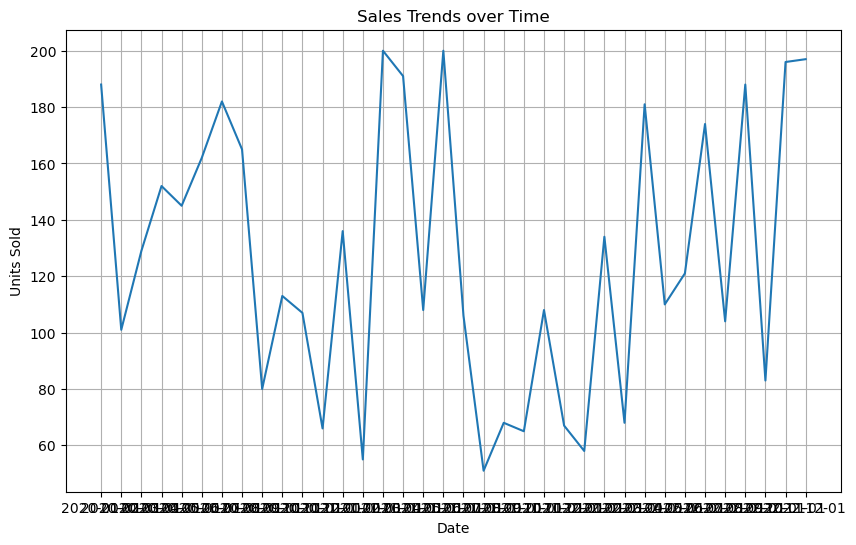

In [47]:
# Sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Date'], sales_data['Units_Sold'])
plt.title('Sales Trends over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

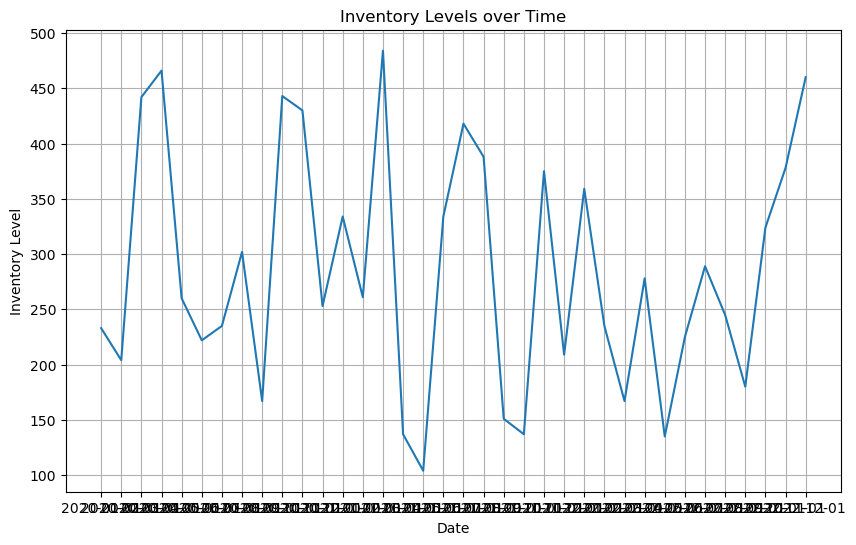

In [48]:
# Inventory levels over time
plt.figure(figsize=(10, 6))
plt.plot(inventory_data['Date'], inventory_data['Inventory_Level'])
plt.title('Inventory Levels over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.grid(True)
plt.show()

#### Step 2: Data Preprocessing and Feature Engineering

In [49]:
# Handle Missing Values
sales_data.isnull().sum()
inventory_data.isnull().sum()

# There are no missing values in the dummy data, so no further action is needed

Date                  0
Product_ID            0
Product_Category      0
Warehouse_Location    0
Inventory_Level       0
Reorder_Level         0
dtype: int64

In [50]:
# Convert Data Types (if necessary)
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
inventory_data['Date'] = pd.to_datetime(inventory_data['Date'])

In [51]:
# Feature Engineering
# Extracting date-related features
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month

inventory_data['Year'] = inventory_data['Date'].dt.year
inventory_data['Month'] = inventory_data['Date'].dt.month

In [52]:
# Normalize/Scale Data (if necessary)
# No normalization or scaling necessary for the dummy data, as all features are on similar scales

In [53]:
# Display the updated data
sales_data.head()

,Date,Customer_ID,Product_ID,Product_Category,Sales_Channel,Sales_Region,Units_Sold,Year,Month
0,2020-01-01,82,A,Electronics,Online,East,188,2020,1
1,2020-02-01,15,C,Electronics,In-store,North,101,2020,2
2,2020-03-01,4,B,Electronics,In-store,East,129,2020,3
3,2020-04-01,95,B,Apparel,In-store,West,152,2020,4
4,2020-05-01,36,B,Apparel,Online,South,145,2020,5


In [54]:
inventory_data.head()

,Date,Product_ID,Product_Category,Warehouse_Location,Inventory_Level,Reorder_Level,Year,Month
0,2020-01-01,B,Apparel,Warehouse C,233,127,2020,1
1,2020-02-01,A,Home & Garden,Warehouse C,204,185,2020,2
2,2020-03-01,B,Electronics,Warehouse A,442,52,2020,3
3,2020-04-01,B,Electronics,Warehouse C,466,191,2020,4
4,2020-05-01,A,Home & Garden,Warehouse B,260,126,2020,5


#### Step 3: Modeling - Forecasting Sales and Inventory Levels

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [56]:
# Split the data into training and validation sets (80% train, 20% validation)
train_sales, val_sales = train_test_split(sales_data, test_size=0.2, shuffle=False)
train_inventory, val_inventory = train_test_split(inventory_data, test_size=0.2, shuffle=False)

In [57]:
# Define function for evaluating ARIMA model
def evaluate_arima_model(train, val, order):
    history = train['Units_Sold'].tolist()
    predictions = []
    for t in range(len(val)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0] # forecasts the next value in the time series
        predictions.append(yhat)
        history.append(val.iloc[t]['Units_Sold'])
    rmse = mean_squared_error(val['Units_Sold'], predictions, squared=False)
    return rmse, predictions

In [58]:
# Evaluate ARIMA model
arima_rmse, arima_predictions = evaluate_arima_model(train_sales, val_sales, order=(5,1,0))
print("ARIMA RMSE:", arima_rmse)

ARIMA RMSE: 43.89172663215031


In [59]:
#!pip install keras

In [60]:
#!pip install tensorflow

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import random
from datetime import datetime, timedelta

# Generate dummy dates
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)
dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Generate dummy data for sales
sales_data = pd.DataFrame({
    'Date': dates,
    'Units_Sold': [random.randint(50, 200) for _ in range(len(dates))]
})

# Select the target variable
sales_series = sales_data['Units_Sold'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(sales_series.reshape(-1, 1))

# Set the number of time steps
n_steps = 3  # Adjust as needed

# Define a function to prepare the data for LSTM
def prepare_lstm_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare the data for LSTM
X, y = prepare_lstm_data(scaled_sales, n_steps)

# Reshape input to be 3D [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(X, y, epochs=200, verbose=0)

# Make predictions
predictions = []
for i in range(len(scaled_sales) - n_steps):
    x_input = scaled_sales[i:i+n_steps].reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0][0])

# Invert scaling for forecasted values
predicted_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# Evaluate RMSE
true_values = sales_series[n_steps:]
LSTM_rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
print("RMSE:", LSTM_rmse)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


RMSE: 44.005398902950105


In [64]:
# Generate forecasts for inventory levels using ARIMA model
inventory_model = ARIMA(train_inventory['Inventory_Level'], order=(5,1,0))
inventory_model_fit = inventory_model.fit()
inventory_forecast = inventory_model_fit.forecast(steps=len(val_inventory))

In [65]:
# Display forecasts
print("\nInventory Level Forecasts:")
print(inventory_forecast)


Inventory Level Forecasts:
28    261.074588
29    284.750143
30    231.041554
31    215.517437
32    267.396719
33    264.818341
34    257.553103
35    235.647784
Name: predicted_mean, dtype: float64


#### Step 4: Model Evaluation and Optimization

In [63]:
# Evaluate model performance
print("ARIMA Model Performance:")
print("RMSE:", arima_rmse)

print("LSTM Model Performance:")
print("RMSE:", LSTM_rmse)

ARIMA Model Performance:
RMSE: 43.89172663215031
LSTM Model Performance:
RMSE: 44.005398902950105


In [66]:
# Compare models
if arima_rmse < LSTM_rmse:
    best_model = "ARIMA"
else:
    best_model = "LSTM"

print("\nBest Model:", best_model)


Best Model: ARIMA


In [67]:
# Sensitivity analysis (if applicable)
# Conduct sensitivity analysis by varying model parameters or assumptions and observing their impact on model performance.

In [68]:
# Iterate (if necessary)
# Refine models, incorporate new data, or adjust parameters based on model performance and business requirements.

#### Step 5: Forecasting and Visualization

In [69]:
# Given that ARIMA was the best-performing model:
final_model = ARIMA(sales_data['Units_Sold'], order=(5,1,0))
final_model_fit = final_model.fit()
forecast = final_model_fit.forecast(steps=12)  # Forecasting for 12 months

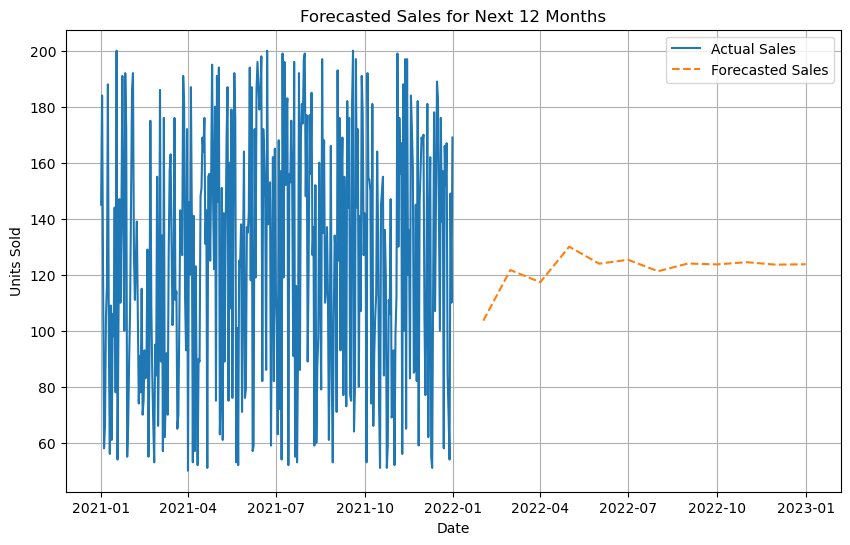

In [70]:
# Visualize forecasts
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Date'], sales_data['Units_Sold'], label='Actual Sales')
plt.plot(pd.date_range(start=sales_data['Date'].iloc[-1], periods=13, freq='MS')[1:], forecast, label='Forecasted Sales', linestyle='--')
plt.title('Forecasted Sales for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.show()

#### Step 6: Monitoring and Refinement

In [71]:
# Continuously monitor model performance
# Keep track of forecast errors and evaluate model performance regularly using appropriate metrics

In [72]:
# Update models
# Incorporate new data as it becomes available and retrain the forecasting models periodically to improve accuracy.

In [73]:
# Refine processes
# Identify opportunities for process improvement based on insights gained from the forecasting analysis, such as improving data quality or refining modeling techniques.

In [74]:
# Feedback loop
# Establish a feedback loop with stakeholders to gather feedback on the usefulness of the forecasts and make adjustments as necessary.

In [75]:
# Documentation
# Document the forecasting process, including data sources, methodology, and assumptions, to ensure transparency and reproducibility.

#### Final Word:
It's important to recognize that forecasting is an iterative and continuous process. The process of forecasting often involves ongoing refinement, adjustment, and improvement to adapt to changing conditions and enhance the accuracy of the forecasts.